# Exploring metrics after training

With this example, we dive deeper into our results and compare each partner performance against the federated model

In [1]:
!wget https://raw.githubusercontent.com/SubstraFoundation/distributed-learning-contributivity/Moving-functions/requirements.txt
!pip install -r requirements.txt
!pip install -i https://test.pypi.org/simple/ subtest==0.0.0.8

--2020-08-26 12:04:45--  https://raw.githubusercontent.com/SubstraFoundation/distributed-learning-contributivity/Moving-functions/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     176  --.-KB/s    in 0s      

2020-08-26 12:04:45 (12.2 MB/s) - ‘requirements.txt’ saved [176/176]

     |████████████████████████████████| 378kB 5.5MB/s 
     |████████████████████████████████| 13.1MB 239kB/s 
     |████████████████████████████████| 14.6MB 212kB/s 
     |████████████████████████████████| 7.1MB 59.3MB/s 
     |████████████████████████████████| 225kB 58.7MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 516.2M

Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 51kB 2.5MB/s 


In [2]:
# imports
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

# Object and methodes needed in order to run a collaborative round
from subtest.dataset import Dataset
from subtest.scenario import Scenario, run_scenario

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


170500096/170498071 [==============================] - 8s 0us/step


## Setup scenario

In [3]:
scenario_params = {
    'partners_count': 3,
    'amounts_per_partner': [0.001, 0.699, 0.3],
}

scenario_params['epoch_count'] = 10
scenario_params['minibatch_count'] = 3

# Chose the contributivity mesuring method

In [4]:
# Here is the difference
scenario_params['methods'] = ["Shapley values"]

In [5]:
current_scenario = Scenario(scenario_params)

2020-08-26 12:06:50.760 | DEBUG    | subtest.scenario:__init__:58 - Dataset selected: mnist
2020-08-26 12:06:50.761 | DEBUG    | subtest.scenario:__init__:93 - Computation use the full dataset for scenario #1
2020-08-26 12:06:50.907 | INFO     | subtest.scenario:__init__:282 - ### Description of data scenario configured:
2020-08-26 12:06:50.908 | INFO     | subtest.scenario:__init__:283 -    Number of partners defined: 3
2020-08-26 12:06:50.909 | INFO     | subtest.scenario:__init__:284 -    Data distribution scenario chosen: random
2020-08-26 12:06:50.910 | INFO     | subtest.scenario:__init__:285 -    Multi-partner learning approach: fedavg
2020-08-26 12:06:50.910 | INFO     | subtest.scenario:__init__:286 -    Weighting option: uniform
2020-08-26 12:06:50.912 | INFO     | subtest.scenario:__init__:287 -    Iterations parameters: 10 epochs > 3 mini-batches > 8 gradient updates per pass
2020-08-26 12:06:50.913 | INFO     | subtest.scenario:__init__:293 - ### Data loaded: mnist
2020-08

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],  28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

input_shape = (28, 28, 1)
num_classes = 10


def preprocess_dataset_labels(y):
    y = np_utils.to_categorical(y, 10)
    return y


def generate_new_model_for_dataset():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2))) 
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(64, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


current_scenario.dataset = Dataset(
    "my_dataset",
    X_train,
    X_test,
    y_train,
    y_test,
    input_shape,
    num_classes,
    preprocess_dataset_labels,
    generate_new_model_for_dataset
)


current_scenario.dataset.train_val_split()

In [7]:
run_scenario(current_scenario)

2020-08-26 12:06:51.666 | INFO     | subtest.scenario:split_data:537 - ### Splitting data among partners:
2020-08-26 12:06:51.667 | INFO     | subtest.scenario:split_data:538 -    Simple split performed.
2020-08-26 12:06:51.668 | INFO     | subtest.scenario:split_data:539 -    Nb of samples split amongst partners: 38878
2020-08-26 12:06:51.668 | INFO     | subtest.scenario:split_data:541 -    Partner #0: 38 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-08-26 12:06:51.669 | INFO     | subtest.scenario:split_data:541 -    Partner #1: 27176 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-08-26 12:06:51.670 | INFO     | subtest.scenario:split_data:541 -    Partner #2: 11664 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-08-26 12:06:51.960 | DEBUG    | subtest.scenario:compute_batch_sizes:585 -    Compute batch sizes, partner #0: 1
2020-08-26 12:06:51.961 | DEBUG    | subtest.scenario:compute_batch_sizes:585 -    Compute batch sizes, partner #1: 1132
2020-08-26 12

0

### Let's see how our accuracy score goes between each partner and compare it with aggregated model performance

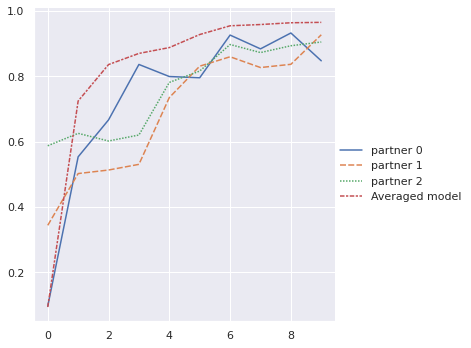

In [8]:
x= current_scenario.mpl.score_matrix_per_partner

x_collective = current_scenario.mpl.score_matrix_collective_models

x = x[:,:,0]
x_collective = x_collective[:,0]


d = {
    'partner 0' : x[:,0],
    'partner 1' : x[:,1],
    'partner 2' : x[:,2],
    'Averaged model' : x_collective
}

df = pd.DataFrame(d)


sns.relplot(data = df, kind = "line")



Aggregated model stills perform a bit better than every individual model.

### Now let look at contributivity scores

We have set our scenario with Shapley values as a contributivity measurement method.

While being quite heavy on computing resources, it provides a great measuring tool.

In [9]:
contributivity_score = current_scenario.contributivity_list

In [10]:
print(contributivity_score[0])


Shapley
Computation time: 0:38:36.629683
Number of characteristic function computed: 7
Contributivity scores: [0.19708333 0.38508333 0.38653333]
Std of the contributivity scores: [0. 0. 0.]
Normalized contributivity scores: [0.20345136 0.39752589 0.39902275]



Since we have artificially set our first partner to only have .1% of the total data set, it obviously contributes less in the final model.

Because we are using the MNIST dataset, even with .1% of the total data, the model is still able to perform reasonably well according to our Accuracy values